# Problem Statement:

1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading training data
train_data = pd.read_csv('SalaryData_train.csv')  

#Loading test data
test_data = pd.read_csv('SalaryData_test.csv')  

In [3]:
train_data.shape

(30161, 14)

In [4]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
train_data.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
28921,36,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
219,40,State-gov,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
16694,44,Local-gov,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,15,United-States,<=50K
24260,60,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,40,United-States,>50K
4464,47,Federal-gov,Some-college,10,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


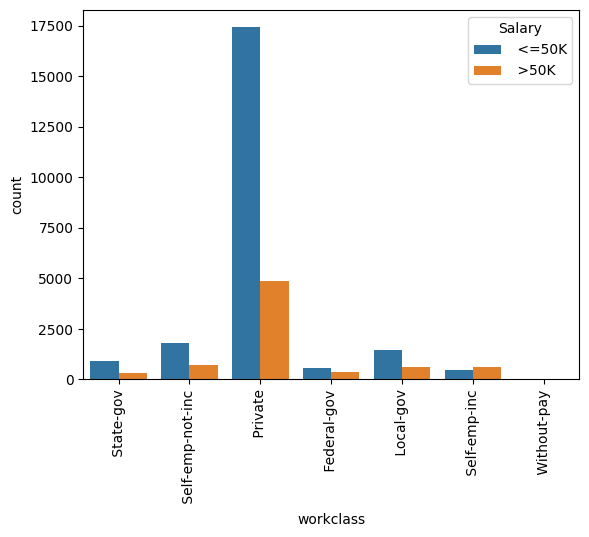

In [9]:
sns.countplot(data=train_data, x='workclass',hue='Salary')
plt.xticks(rotation=90);

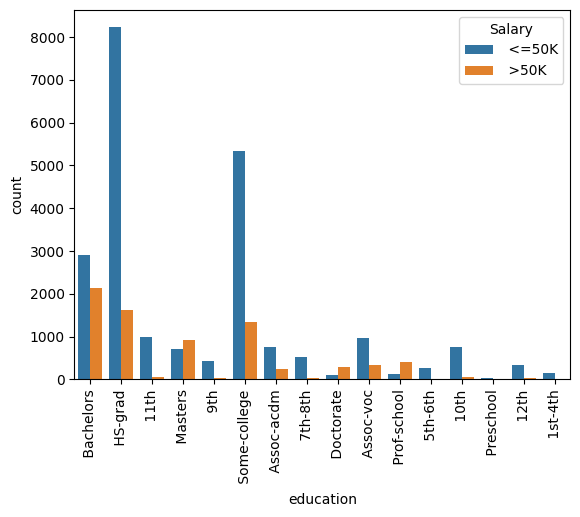

In [10]:
sns.countplot(data=train_data, x='education',hue='Salary')
plt.xticks(rotation=90);

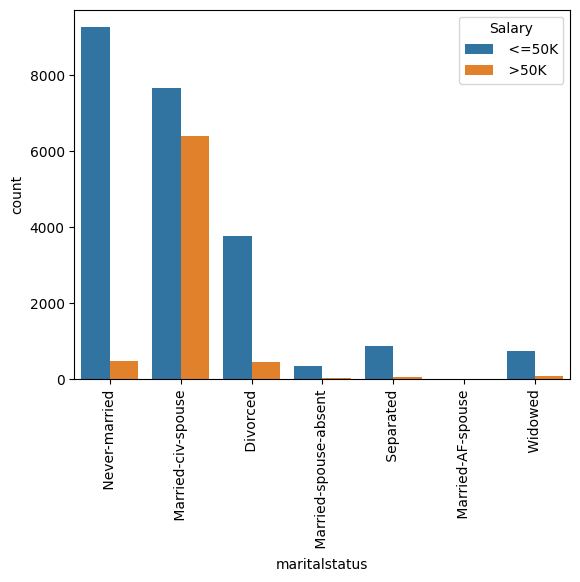

In [11]:
sns.countplot(data=train_data, x='maritalstatus',hue='Salary')
plt.xticks(rotation=90);

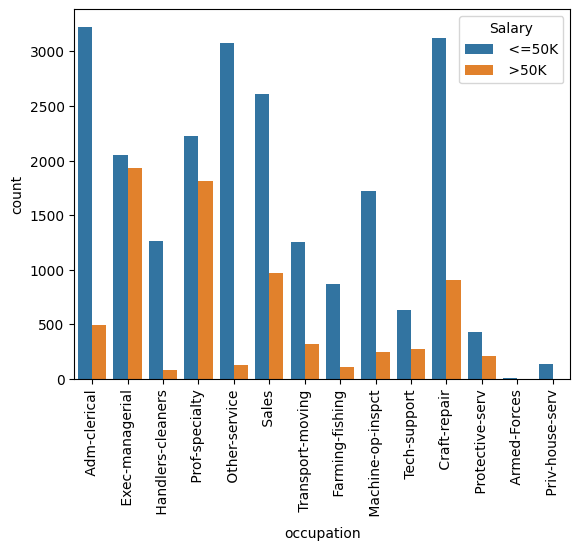

In [12]:
sns.countplot(data=train_data, x='occupation',hue='Salary')
plt.xticks(rotation=90);

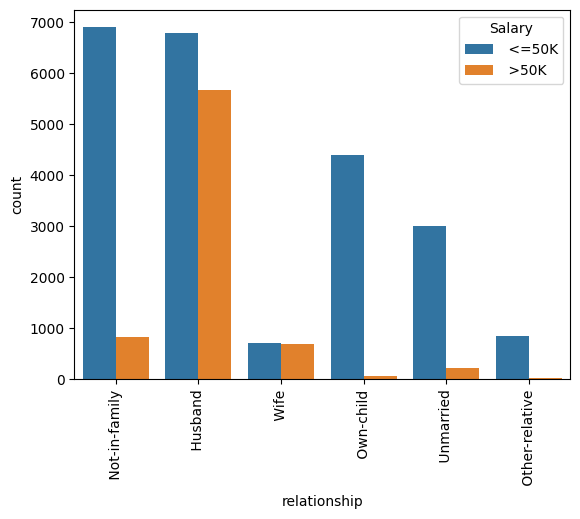

In [13]:
sns.countplot(data=train_data, x='relationship',hue='Salary')
plt.xticks(rotation=90);

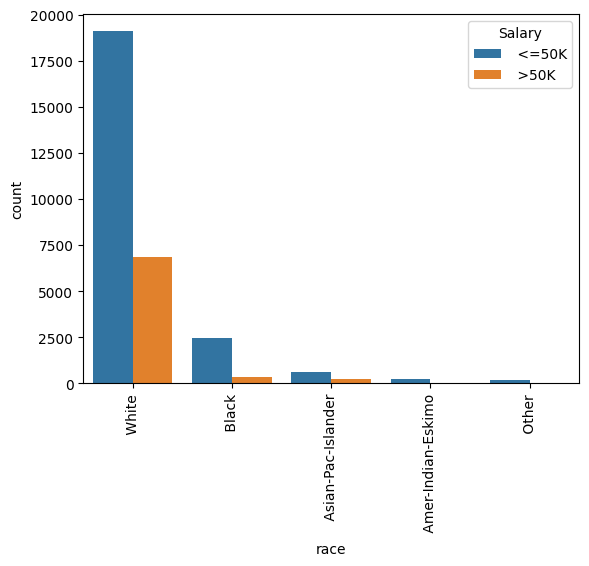

In [14]:
sns.countplot(data=train_data, x='race',hue='Salary')
plt.xticks(rotation=90);

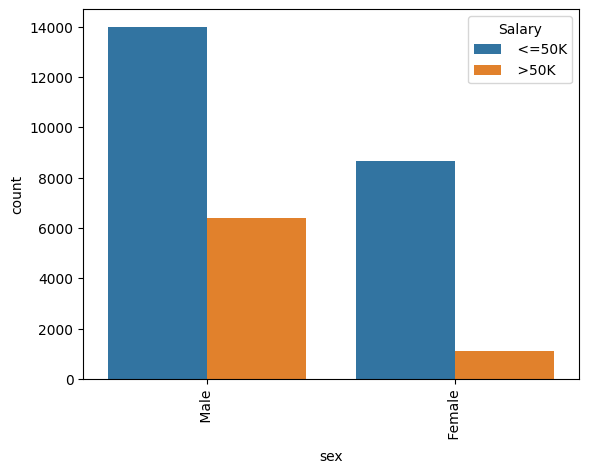

In [15]:
sns.countplot(data=train_data, x='sex',hue='Salary')
plt.xticks(rotation=90);

# Data Preprocessing

### Identifying Duplicates

In [16]:
train_data.duplicated().sum()

3258

In [17]:
###

### Identifying Missing Values

In [18]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

In [21]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


# Data Splitting

In [22]:
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [23]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (30161, 13)
Shape of X_test:  (15060, 13)
Shape of y_train:  (30161,)
Shape of y_test: (15060,)


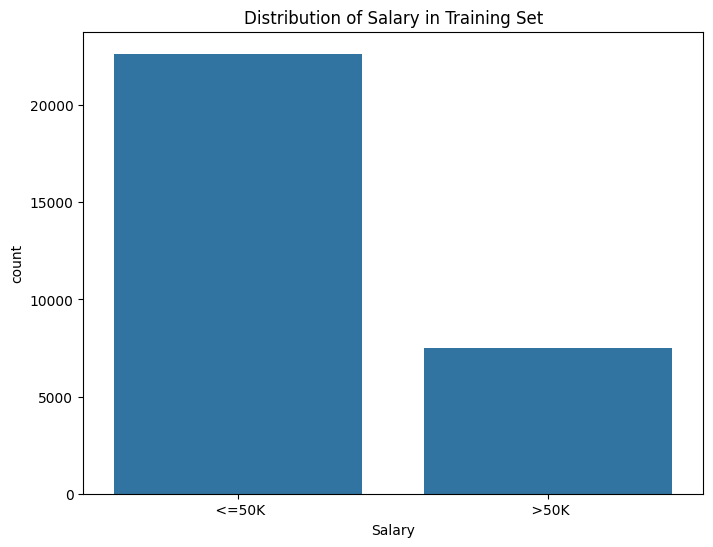

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary', data=train_data)
plt.title('Distribution of Salary in Training Set')
plt.show()

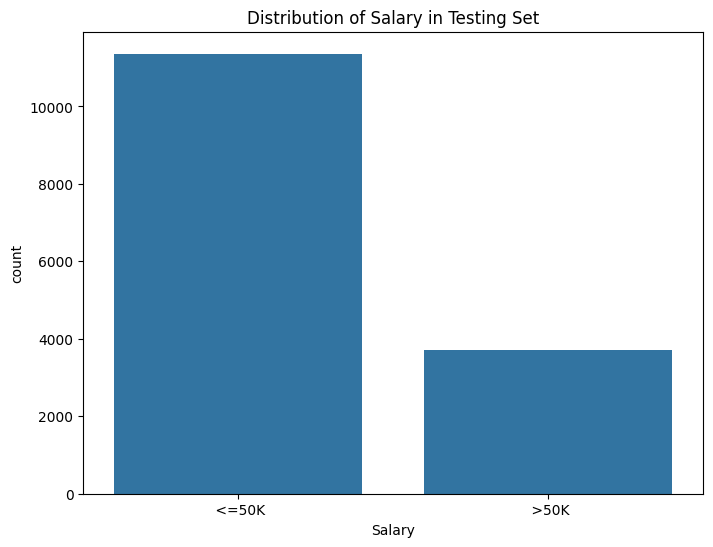

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary', data=test_data)
plt.title('Distribution of Salary in Testing Set')
plt.show()

# Model Selection

# Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

# Model Evaluation

In [28]:
y_pred = gnb_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [30]:
accuracy_score(y_test, y_pred)

0.7946879150066402

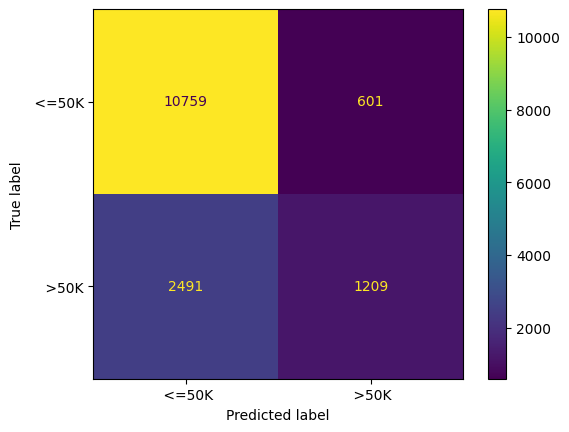

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=gnb_model.classes_).plot();

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



# Multinomial naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
mnb_model =  MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

# Model Evaluation

In [35]:
y_pred = mnb_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.7749667994687915

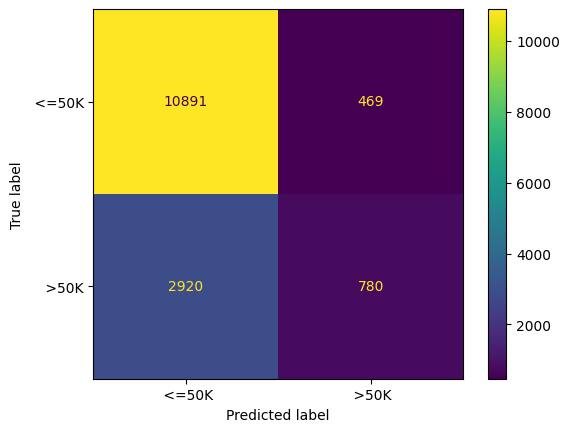

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=mnb_model.classes_).plot();

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



# Bernoulli Naive Bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB

In [40]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

# Model Evaluation

In [41]:
y_pred = bnb_model.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.7284196547144755

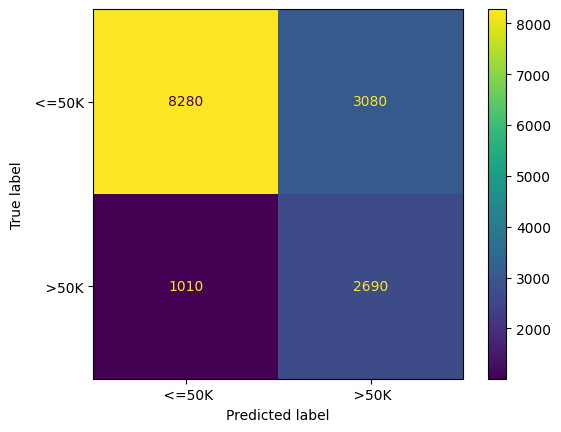

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=bnb_model.classes_).plot();

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.73      0.80     11360
        >50K       0.47      0.73      0.57      3700

    accuracy                           0.73     15060
   macro avg       0.68      0.73      0.69     15060
weighted avg       0.79      0.73      0.74     15060



# Complement Naive Bayes

In [45]:
from sklearn.naive_bayes import ComplementNB

In [46]:
cnb_model = ComplementNB()
cnb_model.fit(X_train, y_train)

ComplementNB()

# Model Evaluation

In [47]:
y_pred = cnb_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.7749667994687915

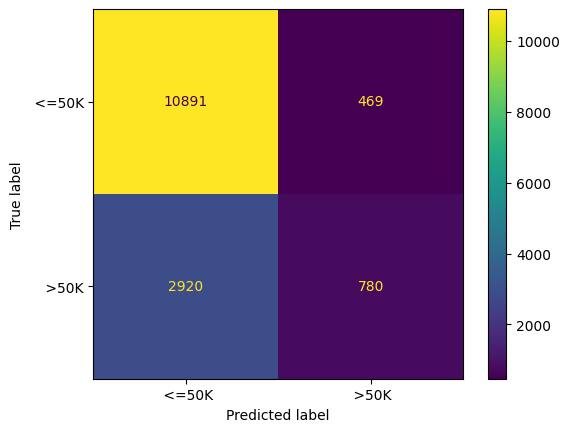

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=cnb_model.classes_).plot();

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



# Model Deployment

In [51]:
# from joblib import dump,load

In [52]:
# dump(final_model, 'gnb_model.joblib')